In [1]:
import pandas as pd
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed.head()

deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [2]:
confirmed.shape

(289, 1077)

In [3]:
confirmed_by_country = confirmed.groupby('Country/Region').sum()
confirmed_by_country.head()

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5084\3864955800.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  confirmed_by_country = confirmed.groupby('Country/Region').sum()


,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/20/22,12/21/22,12/22/22,12/23/22,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,207146,207190,207239,207262,207310,207399,207438,207460,207493,207511
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,333686,333708,333708,333731,333749,333749,333751,333751,333776,333776
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,271182,271186,271190,271193,271194,271198,271198,271202,271208,271217
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,47686,47686,47686,47686,47686,47686,47686,47686,47751,47751
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,104946,104973,104973,104973,104973,104973,104973,105095,105095,105095


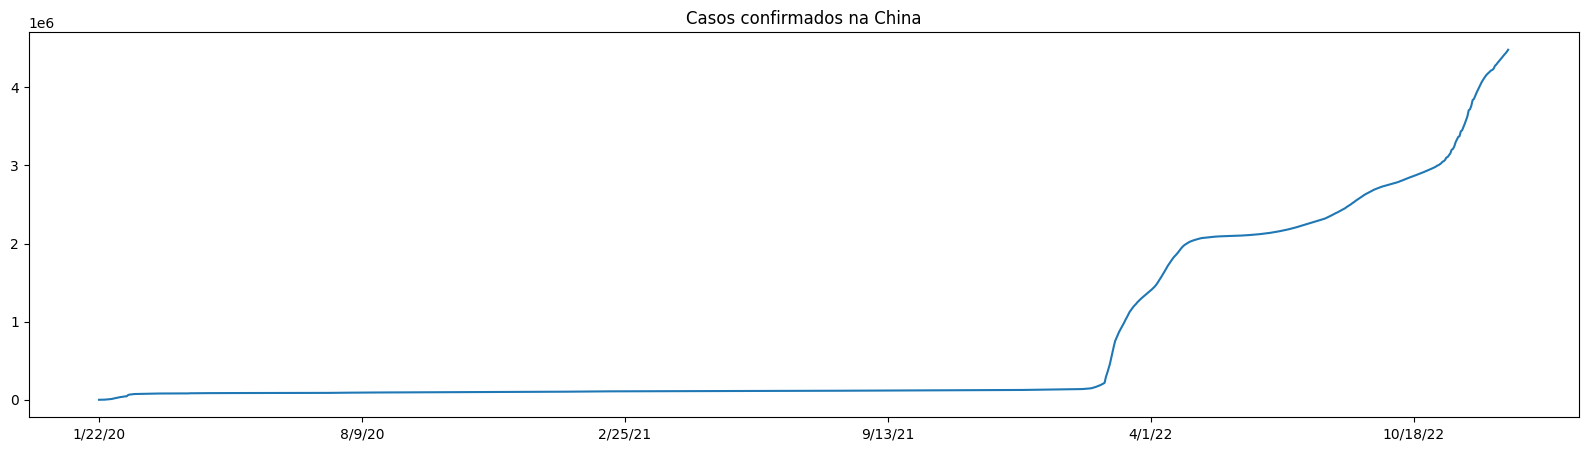

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
confirmed_by_country.loc['China'][2:].plot()
plt.title('Casos confirmados na China')
plt.show()

<AxesSubplot: >

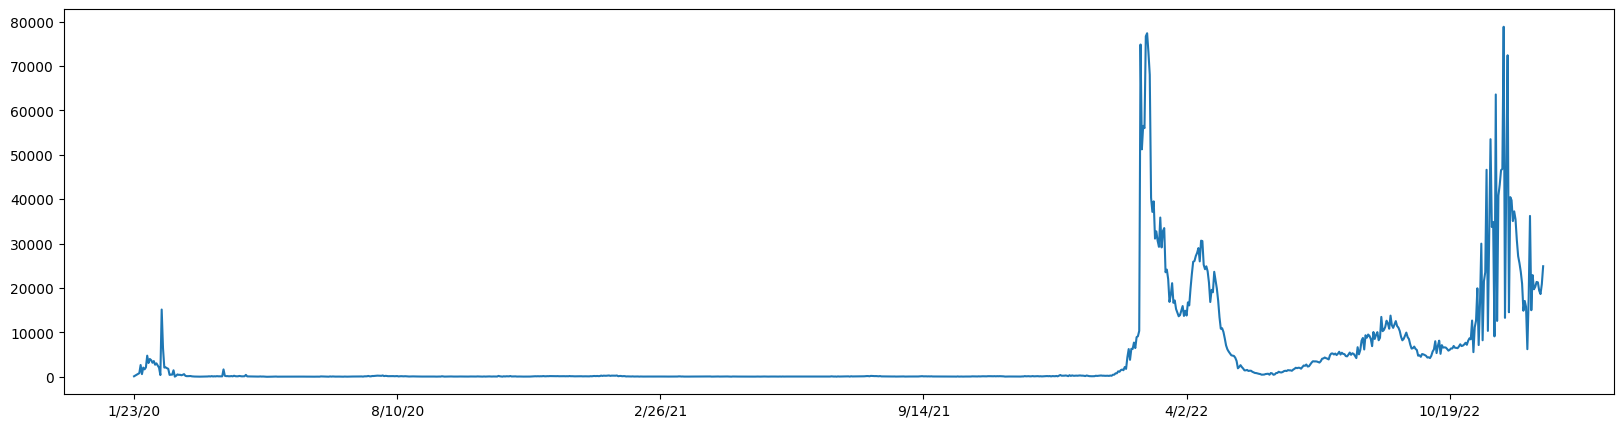

In [5]:
new_cases_china = confirmed_by_country.loc['China'][2:].diff().dropna()
plt.figure(figsize=(20,5))
new_cases_china.plot()

In [6]:
last_date = confirmed.columns[-1]

Text(0.5, 1.0, 'Confirmados por país')

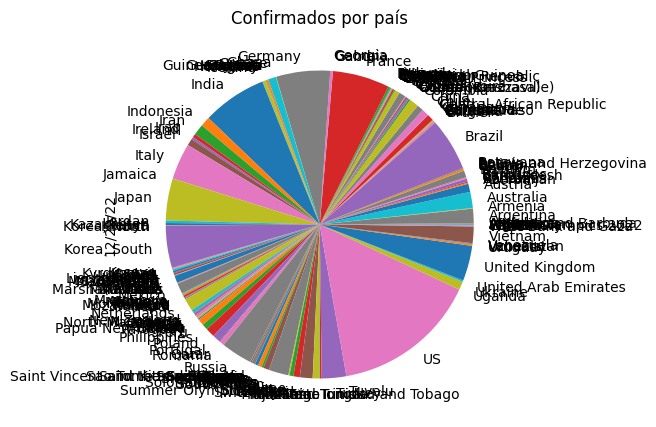

In [7]:
plt.figure(figsize=(20,5))
confirmed_by_country[last_date].plot(kind='pie')
plt.title('Confirmados por país')

Text(0.5, 1.0, 'Confirmados por país')

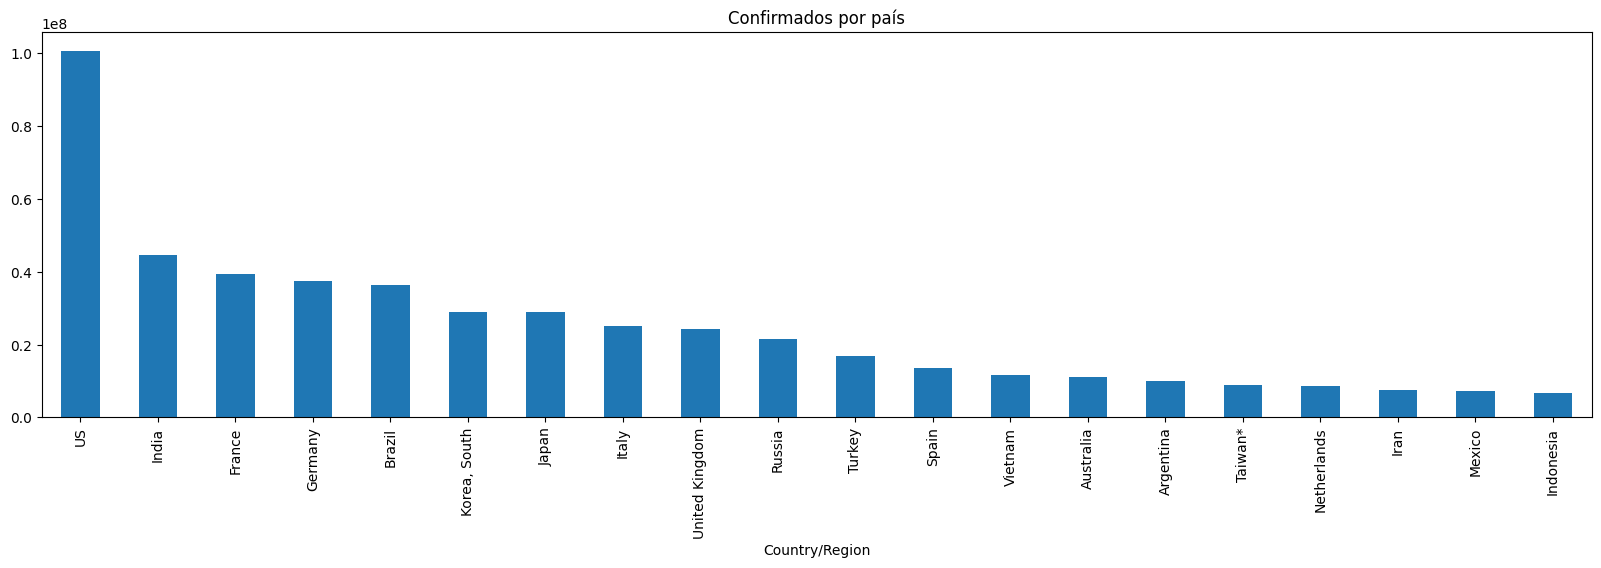

In [8]:
plt.figure(figsize=(20,5))
confirmed_by_country[last_date].sort_values(ascending=False)[0:20].plot(kind='bar')
plt.title('Confirmados por país')

In [9]:
def latest_by_country(data):
    return data.groupby('Country/Region').sum()[last_date]

In [10]:
informations = [latest_by_country(confirmed), latest_by_country(deaths), latest_by_country(recovered)]
informations

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5084\2582602677.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby('Country/Region').sum()[last_date]
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5084\2582602677.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby('Country/Region').sum()[last_date]
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5084\2582602677.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should b

[Country/Region
 Afghanistan             207511
 Albania                 333776
 Algeria                 271217
 Andorra                  47751
 Angola                  105095
                          ...  
 West Bank and Gaza      703228
 Winter Olympics 2022       535
 Yemen                    11945
 Zambia                  334294
 Zimbabwe                259981
 Name: 12/29/22, Length: 201, dtype: int64,
 Country/Region
 Afghanistan             7847
 Albania                 3595
 Algeria                 6881
 Andorra                  165
 Angola                  1930
                         ... 
 West Bank and Gaza      5708
 Winter Olympics 2022       0
 Yemen                   2159
 Zambia                  4023
 Zimbabwe                5637
 Name: 12/29/22, Length: 201, dtype: int64,
 Country/Region
 Afghanistan             0
 Albania                 0
 Algeria                 0
 Andorra                 0
 Angola                  0
                        ..
 West Bank and Gaza 

In [11]:
combined = pd.concat(informations, axis=1)
combined.columns = ['confirmed', 'deaths', 'recovered']
combined

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,207511,7847,0
Albania,333776,3595,0
Algeria,271217,6881,0
Andorra,47751,165,0
Angola,105095,1930,0
...,...,...,...
West Bank and Gaza,703228,5708,0
Winter Olympics 2022,535,0,0
Yemen,11945,2159,0


In [12]:
sum_up = combined.sum()
letality_rate = sum_up['deaths'] / sum_up['confirmed']
print(letality_rate*100)

1.0138744481983046


In [13]:
letality_rate_1 = combined['deaths'] / combined['confirmed'] * 100
combined['letality_rate_1'] = letality_rate_1
letality_rate_1

Country/Region
Afghanistan              3.781486
Albania                  1.077070
Algeria                  2.537083
Andorra                  0.345543
Angola                   1.836434
                          ...    
West Bank and Gaza       0.811686
Winter Olympics 2022     0.000000
Yemen                   18.074508
Zambia                   1.203432
Zimbabwe                 2.168235
Length: 201, dtype: float64

In [14]:
combined

,confirmed,deaths,recovered,letality_rate_1
Country/Region,,,,
Afghanistan,207511,7847,0,3.781486
Albania,333776,3595,0,1.077070
Algeria,271217,6881,0,2.537083
Andorra,47751,165,0,0.345543
Angola,105095,1930,0,1.836434
...,...,...,...,...
West Bank and Gaza,703228,5708,0,0.811686
Winter Olympics 2022,535,0,0,0.000000
Yemen,11945,2159,0,18.074508


In [15]:
letality_rate_2 = (combined['deaths'] / combined['deaths'] + combined['recovered']) * 100
combined['letality_rate_2'] = letality_rate_2

In [16]:
combined

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,207511,7847,0,3.781486,100.0
Albania,333776,3595,0,1.077070,100.0
Algeria,271217,6881,0,2.537083,100.0
Andorra,47751,165,0,0.345543,100.0
Angola,105095,1930,0,1.836434,100.0
...,...,...,...,...,...
West Bank and Gaza,703228,5708,0,0.811686,100.0
Winter Olympics 2022,535,0,0,0.000000,NaN
Yemen,11945,2159,0,18.074508,100.0


In [17]:
combined.sort_values('letality_rate_1', ascending=False)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
"Korea, North",1,6,0,600.000000,100.0
MS Zaandam,9,2,0,22.222222,100.0
Yemen,11945,2159,0,18.074508,100.0
Sudan,63686,4994,0,7.841598,100.0
Syria,57423,3163,0,5.508246,100.0
...,...,...,...,...,...
Tuvalu,2805,0,0,0.000000,NaN
Antarctica,11,0,0,0.000000,NaN
Summer Olympics 2020,865,0,0,0.000000,NaN


<AxesSubplot: xlabel='confirmed', ylabel='letality_rate_1'>

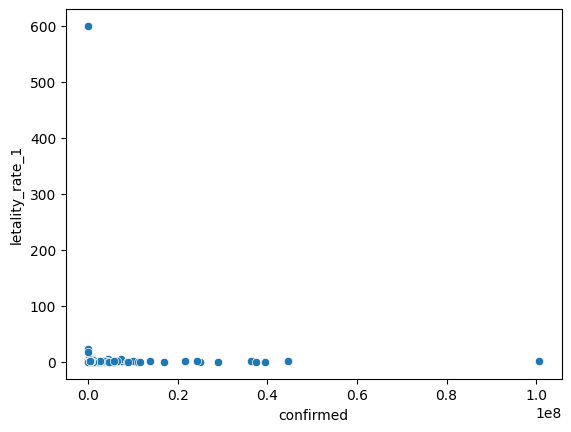

In [18]:
import seaborn as sns
sns.scatterplot(data=combined, x='confirmed', y='letality_rate_1')

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5084\1438026138.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined.query('confirmed > 40')['letality_rate_1'], kde=False)


<AxesSubplot: xlabel='letality_rate_1'>

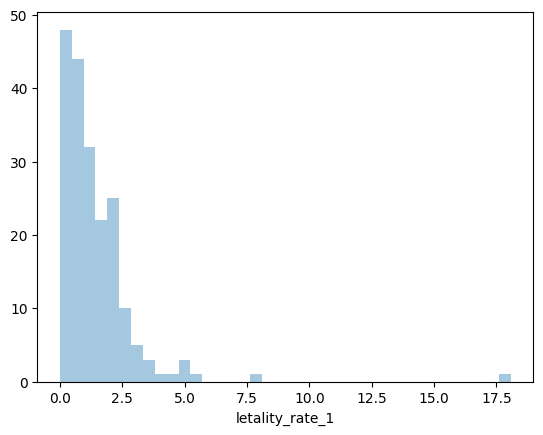

In [19]:
sns.distplot(combined.query('confirmed > 40')['letality_rate_1'], kde=False)

In [20]:
def latest_by_country_at(data, date):
    return data.groupby('Country/Region').sum()[date]

informations = [latest_by_country_at(confirmed, '2/20/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_2_20_20 = pd.concat(informations, axis=1)
combined_2_20_20.columns = ['confirmed', 'deaths', 'recovered']

combined_2_20_20

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5084\1443516049.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby('Country/Region').sum()[date]
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5084\1443516049.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby('Country/Region').sum()[date]
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5084\1443516049.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid fo

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,0,0,0
Albania,0,0,0
Algeria,0,0,0
Andorra,0,0,0
Angola,0,0,0
...,...,...,...
West Bank and Gaza,0,0,0
Winter Olympics 2022,0,0,0
Yemen,0,0,0


# Segunda parte

In [21]:
confirmed.set_index('Country/Region').loc['China'].sum()

Province/State    AnhuiBeijingChongqingFujianGansuGuangdongGuang...
Lat                                                       1085.2923
Long                                                      3688.9377
1/22/20                                                         548
1/23/20                                                         643
                                        ...                        
12/25/22                                                    4396286
12/26/22                                                    4415684
12/27/22                                                    4434310
12/28/22                                                    4455175
12/29/22                                                    4480070
Length: 1076, dtype: object

In [22]:
is_china = confirmed['Country/Region'] == 'China'
is_china.head()

0    False
1    False
2    False
3    False
4    False
Name: Country/Region, dtype: bool

In [23]:
confirmed['is_china'] = is_china
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/21/22,12/22/22,12/23/22,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,is_china
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207190,207239,207262,207310,207399,207438,207460,207493,207511,False
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333708,333708,333731,333749,333749,333751,333751,333776,333776,False
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271186,271190,271193,271194,271198,271198,271202,271208,271217,False
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47686,47686,47686,47751,47751,False
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,104973,104973,104973,105095,105095,105095,False


In [24]:
confirmed.query('is_china == True')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/21/22,12/22/22,12/23/22,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,is_china
59,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,1700,1700,1700,1700,1700,1700,1700,1700,1700,True
60,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,28860,28860,28860,28860,28860,28860,28860,28860,28860,True
61,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,10181,10181,10181,10181,10181,10181,10181,10181,10181,True
62,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,7651,7651,7651,7651,7651,7651,7651,7651,7651,True
63,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,1563,1563,1563,1563,1563,1563,1563,1563,1563,True
64,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,63739,63739,63739,63739,63739,63739,63739,63739,63739,True
65,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,2457,2457,2457,2457,2457,2457,2457,2457,2457,True
66,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,1794,1794,1794,1794,1794,1794,1794,1794,1794,True
67,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,10436,10436,10436,10436,10436,10436,10436,10436,10436,True
68,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,2943,2943,2943,2943,2943,2943,2943,2943,2943,True


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5084\1856261358.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  confirmed.groupby('is_china').sum()['12/26/22'].plot(kind='bar')


<AxesSubplot: xlabel='is_china'>

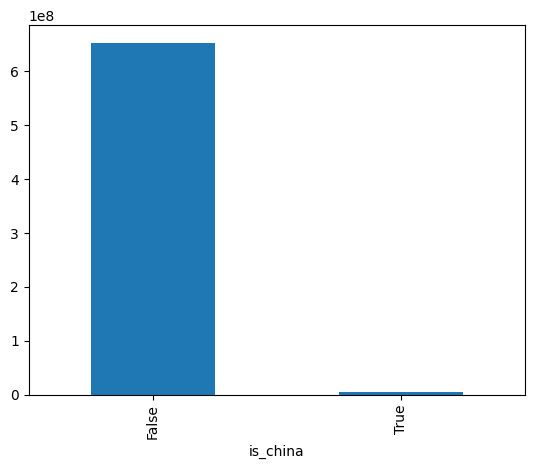

In [25]:
confirmed.groupby('is_china').sum()['12/26/22'].plot(kind='bar')

In [26]:
import numpy as np

confirmed['is_china_label'] = np.where(confirmed['is_china'], 'China', 'Others')
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/22/22,12/23/22,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,is_china,is_china_label
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207239,207262,207310,207399,207438,207460,207493,207511,False,Others
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333708,333731,333749,333749,333751,333751,333776,333776,False,Others
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271190,271193,271194,271198,271198,271202,271208,271217,False,Others
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47686,47686,47751,47751,False,Others
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,104973,104973,105095,105095,105095,False,Others


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5084\704369023.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  confirmed.groupby('is_china_label').sum()[last_date].plot(kind='bar')


<AxesSubplot: xlabel='is_china_label'>

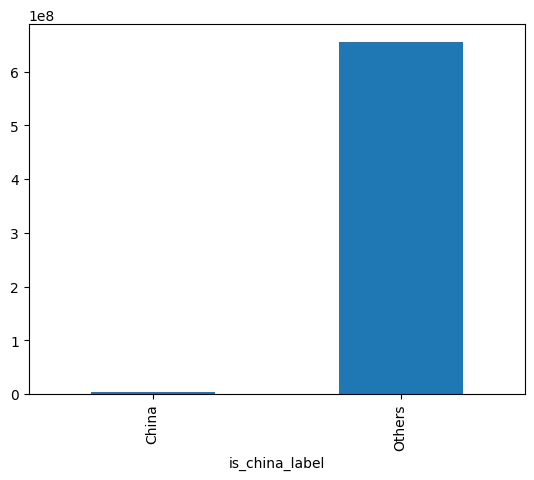

In [27]:
confirmed.groupby('is_china_label').sum()[last_date].plot(kind='bar')

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5084\3213521846.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summed = confirmed.groupby('is_china_label').sum()


<AxesSubplot: xlabel='is_china_label'>

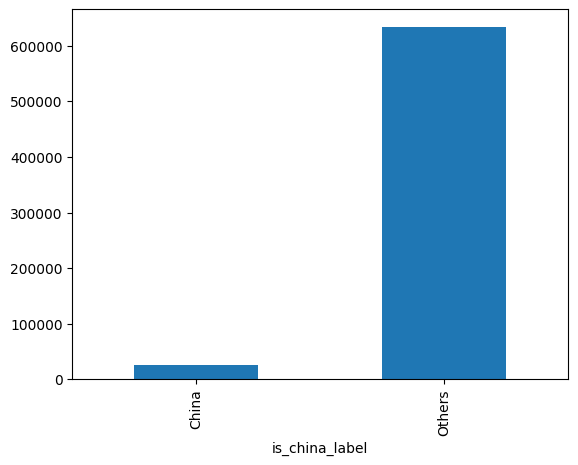

In [28]:
summed = confirmed.groupby('is_china_label').sum()
last_last_date = confirmed.columns[-4]
summed['delta'] = summed[last_date] - summed[(last_last_date)]
summed['delta'].plot(kind='bar')

In [29]:
summed.T

is_china_label,China,Others
Lat,1.085292e+03,4.573980e+03
Long,3.688938e+03,2.677320e+03
1/22/20,5.480000e+02,9.000000e+00
1/23/20,6.430000e+02,1.400000e+01
1/24/20,9.200000e+02,2.400000e+01
...,...,...
12/27/22,4.434310e+06,6.538517e+08
12/28/22,4.455175e+06,6.544535e+08
12/29/22,4.480070e+06,6.550875e+08
is_china,3.400000e+01,0.000000e+00


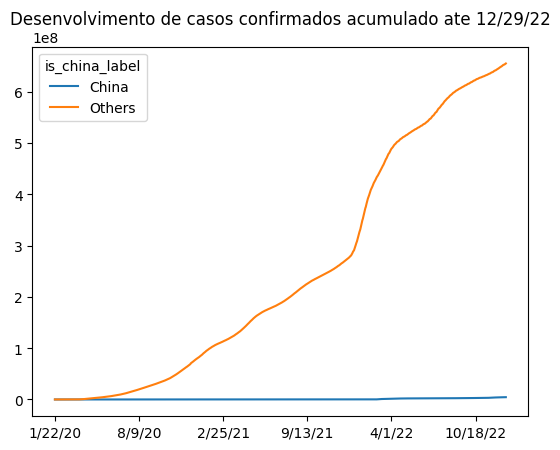

In [30]:
summed.T[2:-2].plot()
plt.title(f'Desenvolvimento de casos confirmados acumulado ate {last_date}')
plt.show()

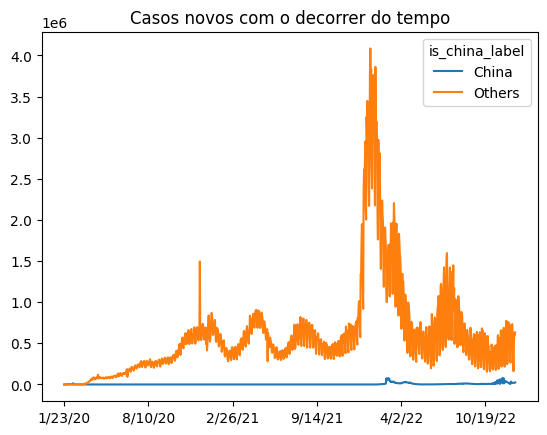

In [31]:
differences = summed.T[2:-2].diff().dropna()
differences.plot()
plt.title('Casos novos com o decorrer do tempo')
plt.show()

In [39]:
cases_last_date_china = summed[last_date]['China']
estimated_population_china = 1426000000
# taxa de incidência para cada 100000 habitantes
incidence_ratio_china = (cases_last_date_china / estimated_population_china) * 100000

In [40]:
incidence_ratio_china

314.1704067321178

In [46]:
un_population = pd.read_csv(r'C:\Users\Gabriel\Desktop\Programação\Alura\Data Science\analise para saude e medicina\WPP2022_TotalPopulationBySex.csv')
un_population['PopTotal'] = un_population['PopTotal'] * 1000
un_population.head()

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5084\431683485.py:1: DtypeWarning: Columns (2,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  un_population = pd.read_csv(r'C:\Users\Gabriel\Desktop\Programação\Alura\Data Science\analise para saude e medicina\WPP2022_TotalPopulationBySex.csv')


,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,NaN,1857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUKUS,2,Medium,1950,1950.5,101683.967,104829.814,206513782.0,12.096
1,NaN,1857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUKUS,2,Medium,1951,1951.5,103204.345,106085.841,209290187.0,12.259
2,NaN,1857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUKUS,2,Medium,1952,1952.5,104727.488,107331.845,212059333.0,12.421
3,NaN,1857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUKUS,2,Medium,1953,1953.5,106093.466,108905.518,214998984.0,12.593
4,NaN,1857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUKUS,2,Medium,1954,1954.5,107669.185,110509.997,218179182.0,12.779


In [47]:
un_population.describe()

,SortOrder,LocID,SDMX_code,LocTypeID,ParentID,VarID,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
count,359502.000000,550866.000000,354474.000000,359502.000000,359502.000000,550866.000000,550866.000000,550866.000000,5.496090e+05,5.496090e+05,5.508660e+05,550866.000000
mean,147.332168,11411.409174,410.088652,4.311189,1217.958042,47.150233,2055.987006,2056.487006,3.375882e+05,3.382506e+05,6.742971e+08,324.831247
std,82.835942,30230.335746,268.835618,1.898939,1004.605977,79.952822,29.453421,29.453421,7.981213e+05,7.968300e+05,1.593410e+09,1876.613518
min,1.000000,4.000000,1.000000,1.000000,0.000000,2.000000,1950.000000,1950.500000,5.670000e-01,6.550000e-01,1.030000e+02,0.049000
25%,76.000000,414.000000,158.000000,4.000000,914.000000,4.000000,2037.000000,2037.500000,1.961569e+03,1.943445e+03,3.765928e+06,35.620000
50%,147.500000,804.000000,415.500000,4.000000,922.000000,7.000000,2058.000000,2058.500000,2.364672e+04,2.398483e+04,4.724329e+07,85.907500
75%,219.000000,1607.000000,643.000000,4.000000,931.000000,16.000000,2079.000000,2079.500000,2.912809e+05,2.949084e+05,5.837649e+08,181.020250
max,290.000000,98505.000000,914.000000,13.000000,5501.000000,207.000000,2100.000000,2100.500000,9.602830e+06,9.603063e+06,1.920589e+10,48162.313000


In [50]:
un_population_total = un_population.query('Time ==2022')[['Location', 'PopTotal']].set_index('Location')

In [68]:
# combined = combined.join(un_population_total)

In [86]:
pesquisa = combined['PopTotal'].isna()

In [87]:
combined[pesquisa]

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal
Antarctica,11,0,0,0.000000,NaN,NaN
Bolivia,1156157,22291,0,1.928025,100.0,NaN
Brunei,266819,225,0,0.084327,100.0,NaN
Burma,633647,19490,0,3.075845,100.0,NaN
Congo (Brazzaville),25375,386,0,1.521182,100.0,NaN
Congo (Kinshasa),95071,1462,0,1.537798,100.0,NaN
Cote d'Ivoire,87941,831,0,0.944952,100.0,NaN
Diamond Princess,712,13,0,1.825843,100.0,NaN
Iran,7560998,144682,0,1.913530,100.0,NaN
"Korea, North",1,6,0,600.000000,100.0,NaN


In [98]:
combined['incidence_ratio'] = combined['confirmed'] / combined['PopTotal'] * 100000
combined['mortality_ratio'] = combined['deaths'] / combined['PopTotal'] * 100000

In [113]:
combined

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal,incidence_ratio,mortality_ratio
Afghanistan,207511,7847,0,3.781486,100.0,41128771.0,504.539754,19.079102
Afghanistan,207511,7847,0,3.781486,100.0,41167393.0,504.066410,19.061202
Afghanistan,207511,7847,0,3.781486,100.0,41090152.0,505.013951,19.097033
Afghanistan,207511,7847,0,3.781486,100.0,41128771.0,504.539754,19.079102
Afghanistan,207511,7847,0,3.781486,100.0,40774503.0,508.923432,19.244870
...,...,...,...,...,...,...,...,...
Zimbabwe,259981,5637,0,2.168235,100.0,16320537.0,1592.968418,34.539305
Zimbabwe,259981,5637,0,2.168235,100.0,16344652.0,1590.618142,34.488345
Zimbabwe,259981,5637,0,2.168235,100.0,16297487.0,1595.221398,34.588155
Zimbabwe,259981,5637,0,2.168235,100.0,16357339.0,1589.384435,34.461595


In [121]:
grouped_per_day = pd.DataFrame([confirmed.sum()[3:-2], recovered.sum()[2:], deaths.sum()[2:]], index=['confirmed', 'recovered', 'death']).T
grouped_per_day.head()

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5084\3347653296.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  grouped_per_day = pd.DataFrame([confirmed.sum()[3:-2], recovered.sum()[2:], deaths.sum()[2:]], index=['confirmed', 'recovered', 'death']).T


,confirmed,recovered,death
1/22/20,557.0,30.0,17.0
1/23/20,657.0,32.0,18.0
1/24/20,944.0,39.0,26.0
1/25/20,1437.0,42.0,42.0
1/26/20,2120.0,56.0,56.0


In [123]:
grouped_per_day['letality_rate_1'] = grouped_per_day['death'] / grouped_per_day['confirmed']
grouped_per_day['letality_rate_2'] = grouped_per_day['death'] / (grouped_per_day['death'] + grouped_per_day['recovered'])

In [124]:
grouped_per_day.head()

,confirmed,recovered,death,letality_rate_1,letality_rate_2
1/22/20,557.0,30.0,17.0,0.030521,0.361702
1/23/20,657.0,32.0,18.0,0.027397,0.360000
1/24/20,944.0,39.0,26.0,0.027542,0.400000
1/25/20,1437.0,42.0,42.0,0.029228,0.500000
1/26/20,2120.0,56.0,56.0,0.026415,0.500000


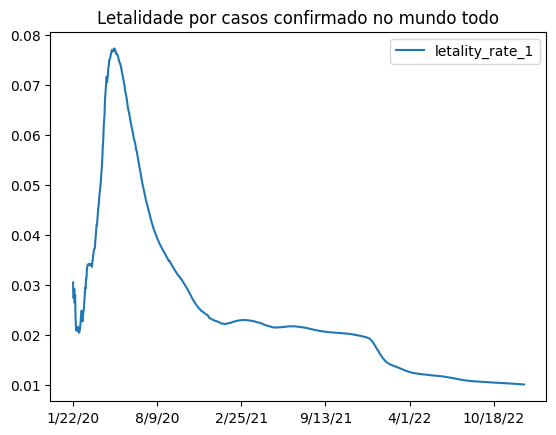

In [131]:
grouped_per_day['letality_rate_1'].plot()
plt.title('Letalidade por casos confirmado no mundo todo')
plt.legend()
plt.show()

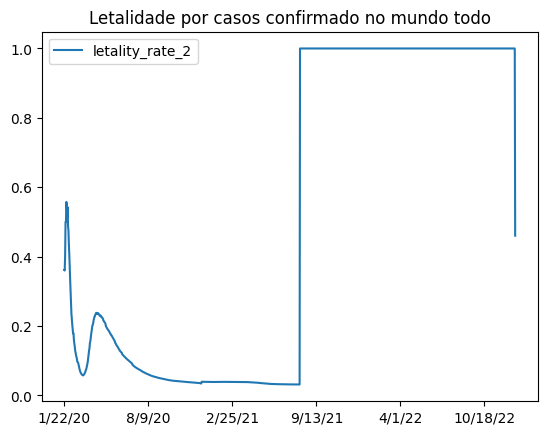

In [132]:
grouped_per_day['letality_rate_2'].plot()
plt.title('Letalidade por casos confirmado no mundo todo')
plt.legend()
plt.show()